# Module 2: Epidemic Modeling Template

## Team Members:
Karinna Fink

Roy Chen

## Project Title:
*(Fill in)*

## Project Goal:
This project seeks to... *(what is the purpose of your project -- i.e., describe the question that you seek to answer by analyzing data.)*

## 1. Data and disease background
You can fill out this section throughout the module as you uncover more information about the mystery disease.

By the end of the module (when submitting), you should have some information about each of the following points:
* Prevalence & incidence in the UVA population
* Economic burden (you can generalize from respiratory viruses)
* Symptoms
* Biological mechanisms (anatomy, organ physiology, cell & molecular physiology - you can generalize from viral biology)


## 2. Data Analysis
This section should be filled out sequentially as a full report of the work you've done over this module. You can copy and paste code from any main.py file here, and run it to produce plots. Once you gain more information throughout the module, you do not need to go back and "fix" earlier results. In other words, if your early predictions are found to be wrong when gaining new data, do not go back and rewrite them.

### 2a. Methods

*IN A SUMMARY, DESCRIBE THE METHODS YOU USED TO ANALYZE AND MODEL THE DATA.*


<div style="
    border-left: 6px solid #fbc02d;
    background-color: #fff8e1;
    padding: 10px 15px;
    border-radius: 4px;
">
<b style="color:#f57f17;">ANALYSIS AFTER DATA RELEASE #1</b> 

</div>






### 2b. Plot the data & estimate initial growth rate (R0) from early data (through day 45)

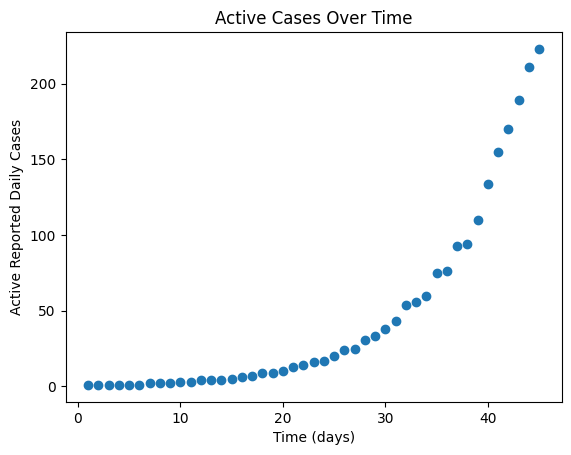

In [10]:
import pandas as pd # used to import csv file as a data frame
import matplotlib.pyplot as plt # used to plot scatterplot

#bring in the data from the csv file and assign it to a data frame variable 
data = pd.read_csv('/Users/roychen/Desktop/Comp BME/Module-2-Chen_fink/Module-2-Epidemics-SIR-Modeling/Data/mystery_virus_daily_active_counts_RELEASE#1.csv', parse_dates=['date'], header=0, index_col=None)

days = []
active_cases = []

# In this block, we iterate over each row of the 'day' and 'active reported daily cases' columns in the csv file and add them to a list to use as the x and y axes of the scatterplot. 
for day in data['day']:
    days.append(day)

for case in data['active reported daily cases']:
    active_cases.append(case)


plt.scatter(days, active_cases) #creates a scatterplot with days on the x axis and active cases on the y axis
plt.title("Active Cases Over Time")
plt.xlabel("Time (days)")
plt.ylabel("Active Reported Daily Cases")
plt.show()

### Estimate R0 for the mystery virus data using a fit to the exponential growth in I code

Estimated growth rate r = 0.11983 per day
Estimated R0 range (D=7–11 days): 2.314 – 3.736


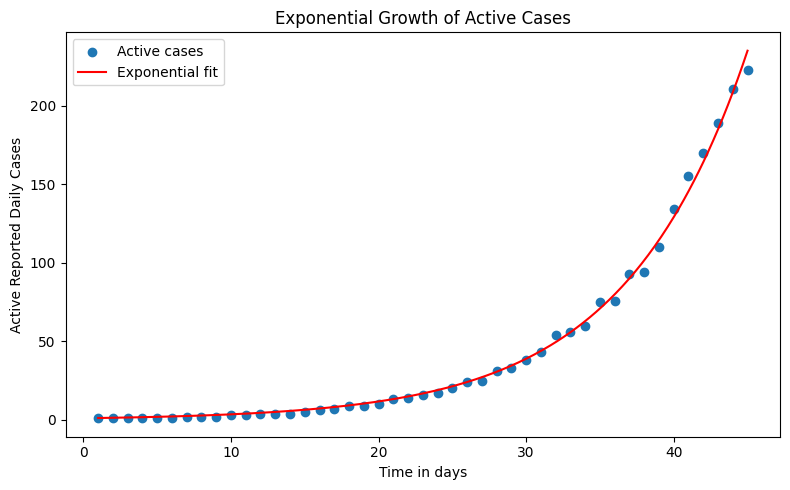

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math


# Load the data
data = pd.read_csv(
    "../Data/mystery_virus_daily_active_counts_RELEASE#1.csv",
    parse_dates=["date"]
)

# Extract time  and active cases
days = data["day"].to_numpy(dtype=float)
active_cases = data["active reported daily cases"].to_numpy(dtype=float)

# Remove zero values so the graph can be plotted 
mask = active_cases > 0
days = days[mask]
active_cases = active_cases[mask]


# Exponential model: I(t) = A * exp(r t)
def exponential_growth(t, A, r):
    return A * np.exp(r * t)

# Initial parameters
initial_guess = (active_cases[0], 0.1)

# Fit the model
params, covariance = curve_fit(exponential_growth, days, active_cases, p0=initial_guess)
A_hat, r_hat = params

# 
# Estimate R0 and  Infectious period range
D_low = 7.0
D_high = 11.0

R0_low = math.exp(r_hat * D_low)
R0_high = math.exp(r_hat * D_high)

print(f"Estimated growth rate r = {r_hat:.5f} per day")
print(f"Estimated R0 range (D=7–11 days): {R0_low:.3f} – {R0_high:.3f}")


# Plot data + exponential fit

plt.figure(figsize=(8,5))
plt.scatter(days, active_cases, label="Active cases ")

t_fit = np.linspace(days.min(), days.max(), 400)
I_fit = exponential_growth(t_fit, A_hat, r_hat)

plt.plot(t_fit, I_fit, color="red", label="Exponential fit")

plt.title("Exponential Growth of Active Cases")
plt.xlabel("Time in days")
plt.ylabel("Active Reported Daily Cases")
plt.legend()
plt.tight_layout()
plt.show()

### What viruses have a similar R0? Use the viruses.html file to find a virus or 2 with a similar R0 and give a 1-2 sentence background of the diseases.
### How accurate do you think your R0 estimate is?

##### our estimated R₀ for the mystery virus is approximately 2.4-3.8. on viruses.html, Hepatitis A has an R0 of about 3.5, which is within the given range, Hepatitis A is a viral infection that primarily affects the liver and can cause symptoms such as fever, fatigue, nausea, abdominal pain, and jaundice. It spreads mainly through often via contaminated food or water or through close personal contact.

### Reflection Questions: 
1. What do you notice about initial infections?

The the number of active cases per day is increasing in an exponential pattern.

2. How could we measure how quickly its spreading?

We could fit an exponential curve to the data and use the equation of the best fit curve to find the rate of spread.

3. What information about the virus would be helpful in determining the shape of the outbreak curve?

How many other people an infected person infects on average, length of incubation period, length of infectious period.


<div style="
    border-left: 6px solid #fbc02d;
    background-color: #fff8e1;
    padding: 10px 15px;
    border-radius: 4px;
">
<b style="color:#f57f17;">ANALYSIS AFTER DATA RELEASE #2</b> 

</div>



### 2c. Use Euler's method to solve the SEIR model.
This section should come from your python code after Data Release #2.

### 2d. Fit the SEIR model to the data by changing beta, gamma, and sigma.
This section should come from your python code after Data Release #2.

### 2e. Plot the model-predicted infections over time compared to the data.
This section should come from your python code after Data Release #2.

### 2e. Predict the day and amount of active cases at the peak of the epidemic spread.
This section should come from your python code after Data Release #2.



<div style="
    border-left: 6px solid #fbc02d;
    background-color: #fff8e1;
    padding: 10px 15px;
    border-radius: 4px;
">
<b style="color:#f57f17;">ANALYSIS AFTER DATA RELEASE #3</b> 

</div>



### 2f. Plot the full dataset (Data Release #3) against your model.
This section should come from your python code after Data Release #3.


### 2g. Intervention strategies for new outbreak at VT (70 days of infection)
This section should come from your python code after Data Release #3.



## Verify and validate your analysis: 

*(Describe how you checked to see that your analysis gave you an answer that you believe (verify). Describe how your determined if your analysis gave you an answer that is supported by other evidence (e.g., a published paper).*

## Conclusions and Ethical Implications: 
*(Think about the answer your analysis generated, draw conclusions related to your overarching question, and discuss the ethical implications of your conclusions.*

## Limitations and Future Work: 
*(Think about the answer your analysis generated, draw conclusions related to your overarching question, and discuss the ethical implications of your conclusions.*